In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [18]:
houseData = pd.read_csv("/content/gdrive/MyDrive/EE0005/LAB7/train.csv")
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])
X.head()

,GrLivArea,GarageArea
0,1710,548
1,1262,460
2,1786,608
3,1717,642
4,2198,836


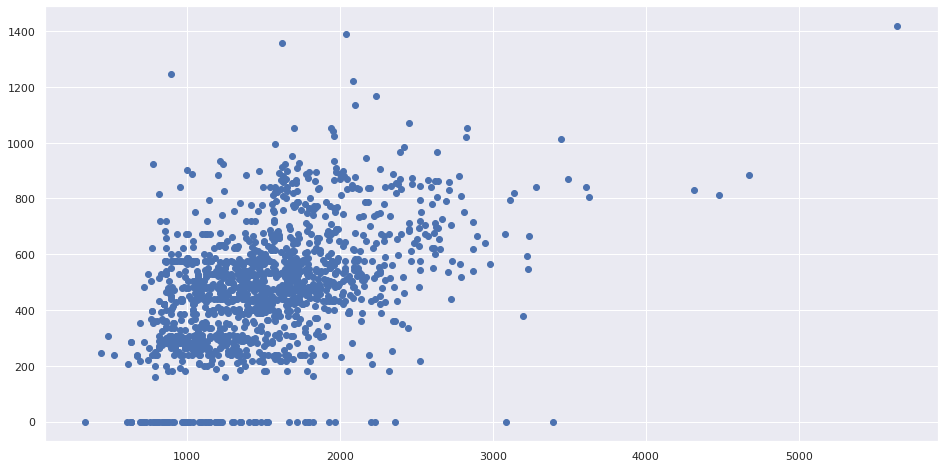

In [20]:
X = pd.DataFrame(houseData[["GrLivArea", "GarageArea"]])

f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

In [21]:
from sklearn.cluster import KMeans
num_clust = 3

kmeans = KMeans(n_clusters = num_clust)

kmeans.fit(X)

KMeans(n_clusters=3)

In [22]:
# Print the Cluster Centers
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="         ")
    print()

Features 	GrLivArea 	GarageArea

Cluster 0:	1700.51         522.5         
Cluster 1:	1088.15         375.58         
Cluster 2:	2577.98         683.8         


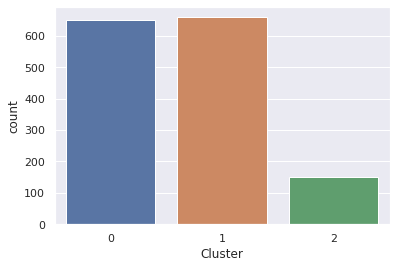

In [23]:
labels = kmeans.predict(X)

X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

sb.countplot(x=X_labeled["Cluster"])

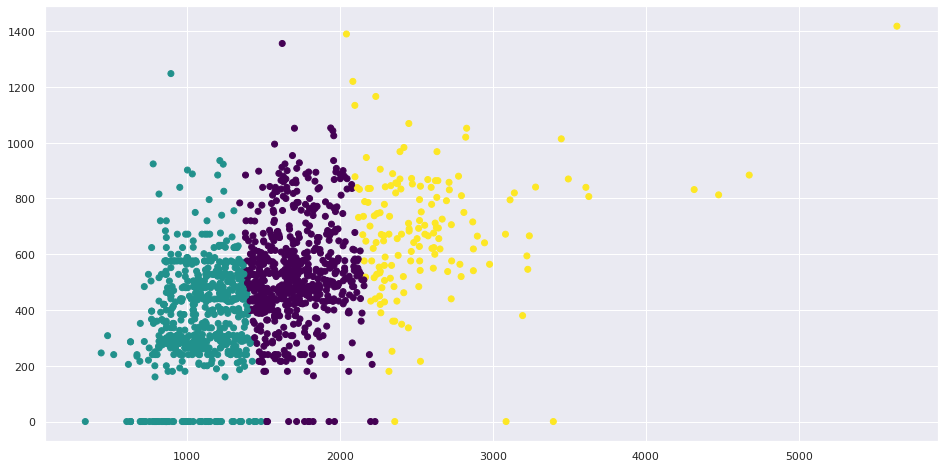

In [24]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

In [25]:
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 140817283.8069684


#Problem 2

In [26]:
from sklearn.neighbors import LocalOutlierFactor

In [27]:
num_neighbors = 20 
cont_fraction = 0.05

lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

lof.fit(X)

LocalOutlierFactor(contamination=0.05)

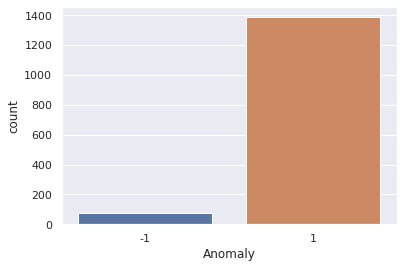

In [28]:
labels = lof.fit_predict(X)

X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

sb.countplot(x=X_labeled["Anomaly"])

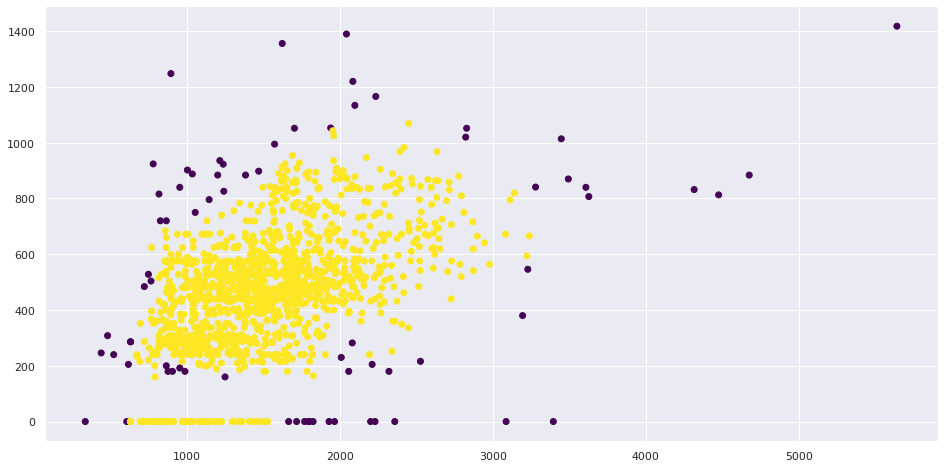

In [29]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'viridis', data = X_labeled)

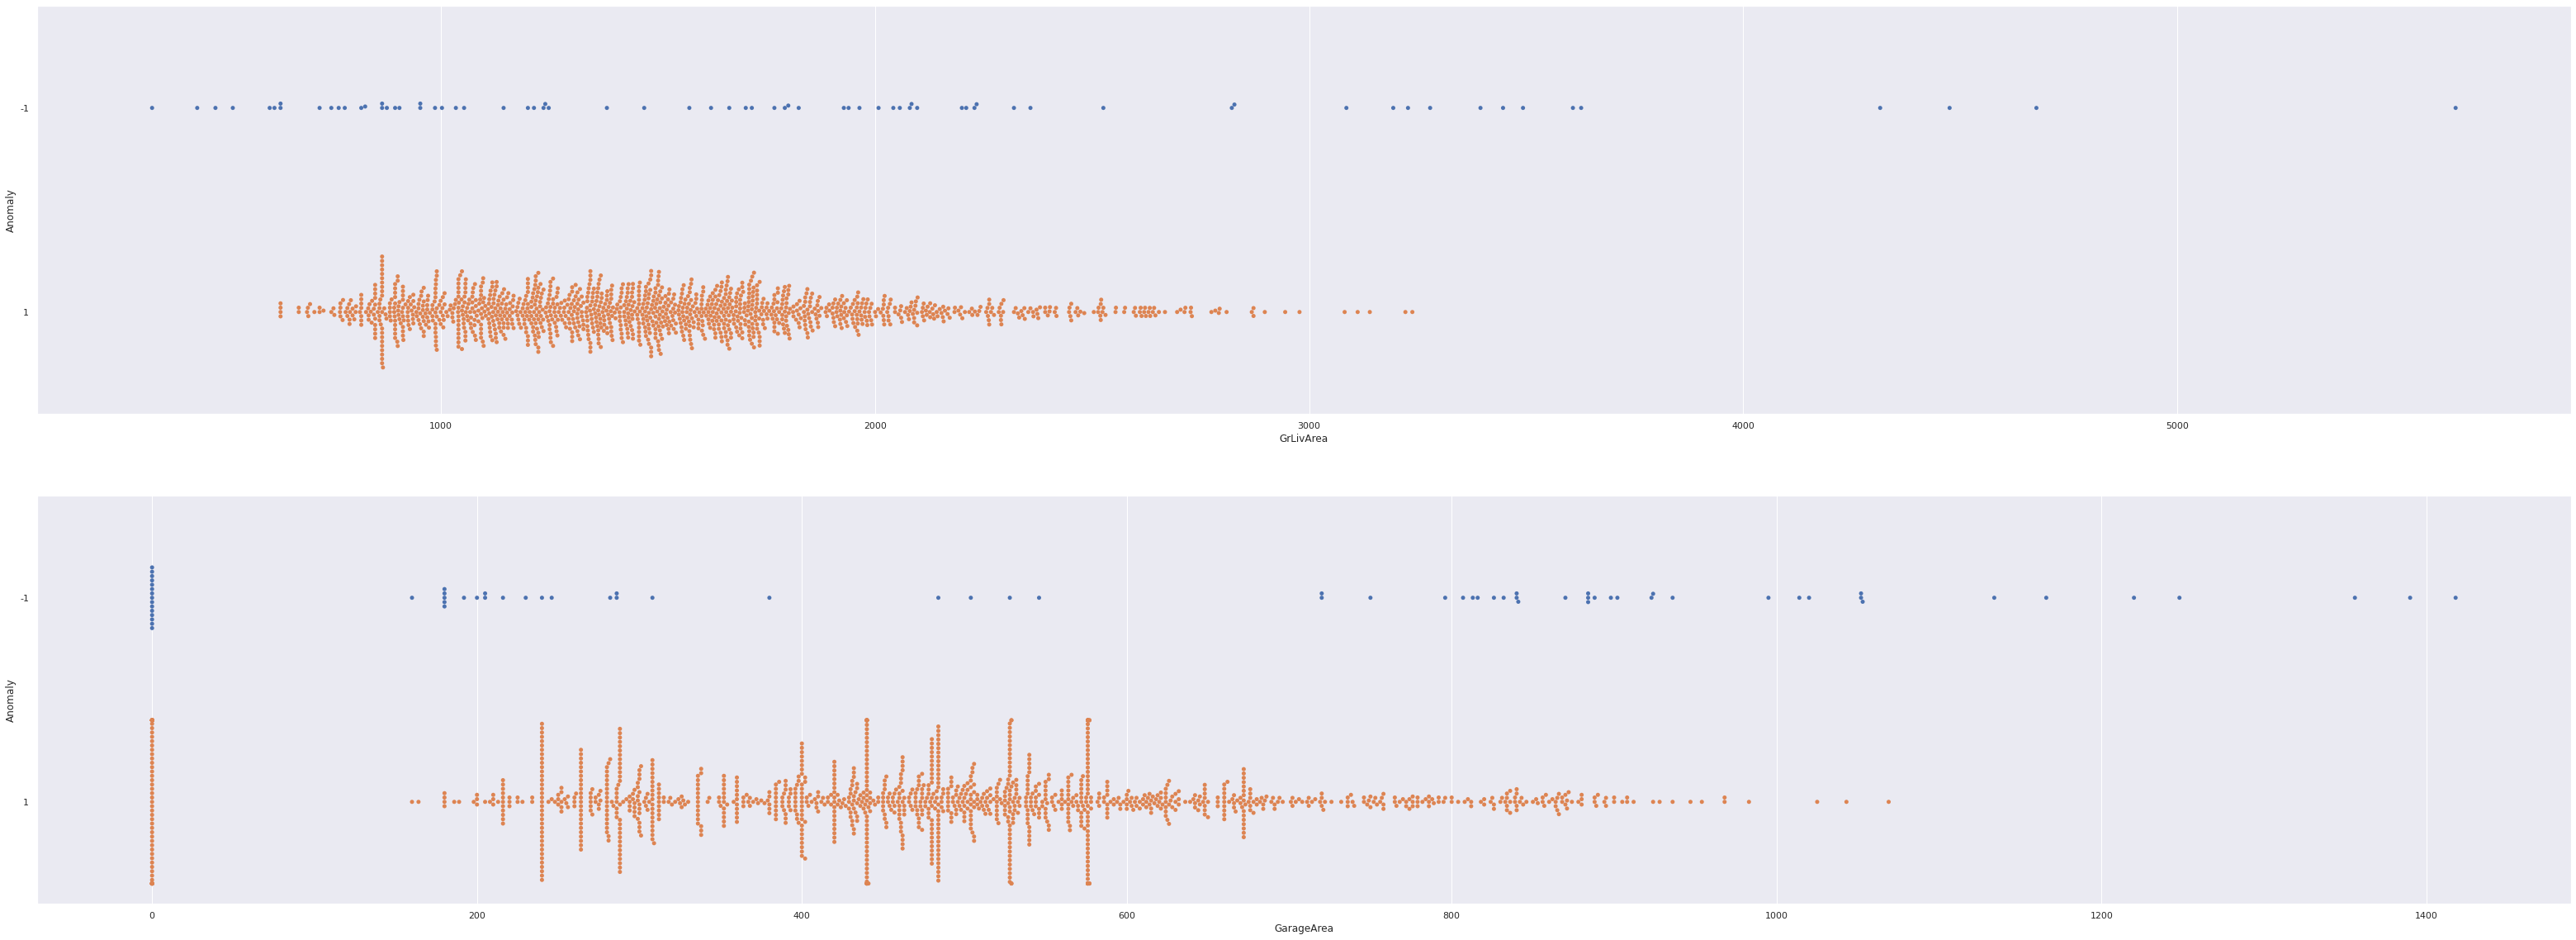

In [35]:
f, axes = plt.subplots(2, 1, figsize=(55,20))
sb.swarmplot(x = 'GrLivArea', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.swarmplot(x = 'GarageArea', y = 'Anomaly', data = X_labeled, ax = axes[1])